In [ ]:
!ls /content/drive/MyDrive/CV\ project/data/image

origin.7z.001  origin.7z.003  origin.7z.005  origin.7z.007
origin.7z.002  origin.7z.004  origin.7z.006  origin.7z.008


In [ ]:
!7za -y x "/content/drive/MyDrive/CV project/data/image/origin.7z.*"


7-Zip (a) [64] 16.02 : Copyright (c) 1999-2016 Igor Pavlov : 2016-05-21
p7zip Version 16.02 (locale=en_US.UTF-8,Utf16=on,HugeFiles=on,64 bits,2 CPUs Intel(R) Xeon(R) CPU @ 2.30GHz (306F0),ASM,AES-NI)

Scanning the drive for archives:
  0M Scan /content/drive/MyDrive/CV project/data/image/                                                       8 files, 8113576419 bytes (7738 MiB)
  0%    
Extracting archive: /content/drive/MyDrive/CV project/data/image/origin.7z.001
--
Path = /content/drive/MyDrive/CV project/data/image/origin.7z.001
Type = Split
Physical Size = 1048576000
Volumes = 8
Total Physical Size = 8113576419
----
Path = origin.7z
Size = 8113576419
--
Path = origin.7z
Type = 7z
Physical Size = 8113576419
Headers Size = 863607
Method = LZMA:25
Solid = +
Blocks = 2

  0%      0% - origin/afraid_African_214.jpg            

In [ ]:
!cp -r ./origin "/content/drive/MyDrive/CV project"

In [2]:
label_file_path=r"/content/drive/MyDrive/CV project/data/label/label.lst"
images_folder_path=r"/content/drive/MyDrive/CV project/data/image"

In [3]:
from numpy import split
import pandas as pd
df_info = pd.read_csv(label_file_path,sep=" ",header=None)
col_names="image_name face_id_in_image face_box_top face_box_left face_box_right face_box_bottom face_box_confidence expression_label".split()
df_info.columns = col_names

df_info

,image_name,face_id_in_image,face_box_top,face_box_left,face_box_right,face_box_bottom,face_box_confidence,expression_label
0,angry_actor_104.jpg,0,28,113,226,141,22.9362,0
1,angry_actor_109.jpg,0,31,157,345,219,50.3056,0
2,angry_actor_120.jpg,1,53,53,372,372,13.9434,2
3,angry_actor_13.jpg,0,77,51,362,388,85.8104,3
4,angry_actor_132.jpg,0,95,31,412,476,82.3948,0
...,...,...,...,...,...,...,...,...
91788,surprised_expression_546.jpg,0,70,70,351,351,37.7117,5
91789,surprised_expression_381.jpg,0,51,61,117,107,91.6307,5
91790,surprised_expression_395.jpg,0,27,95,258,190,96.2861,5
91791,ecstatic_asian_31.jpg,0,60,136,184,108,39.9223,3


In [4]:
df_sel=df_info[df_info.face_box_confidence > 40]

In [5]:
df_sel.shape

(57931, 8)

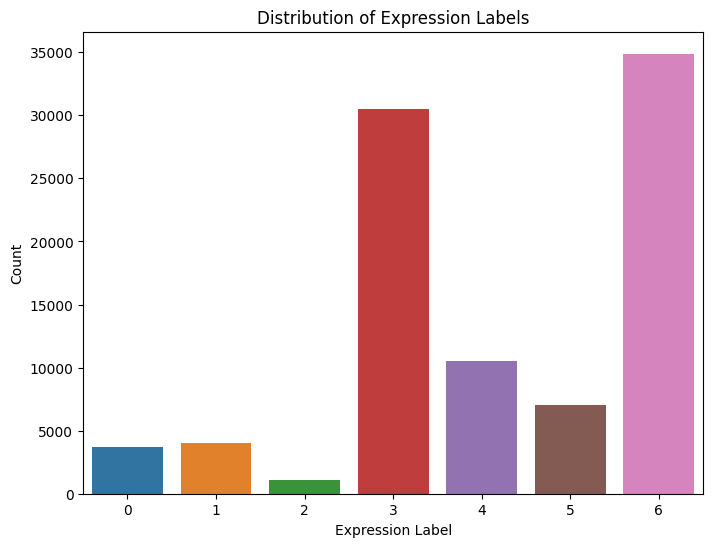

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot a bar chart for expression labels
plt.figure(figsize=(8, 6))
sns.countplot(x='expression_label', data=df_info)
plt.xlabel('Expression Label')
plt.ylabel('Count')
plt.title('Distribution of Expression Labels')
plt.show()

In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder


In [24]:
from numpy.core.fromnumeric import resize
import cv2
import matplotlib.pyplot as plt
import os

image_directory = '/content/drive/MyDrive/CV project/origin'
cropped_directory = '/content/drive/MyDrive/CV project/cropped'

x = []
y = []
for i, row in df_sel.sample(2000).iterrows():
    img_name = row["image_name"]
    x1 = row["face_box_left"]
    x2 = row["face_box_right"]
    y1 = row["face_box_top"]
    y2 = row["face_box_bottom"]
    label = row["expression_label"]
    img_path = os.path.join(image_directory, img_name)
    img = cv2.imread(img_path)
    # Check if img is not None
    if img is not None:
    #     # Crop the image using the provided coordinates
         cropped_img = img[y1:y2, x1:x2]
    else:
        continue

    if cropped_img is not None:
      resized_face = cv2.resize(cropped_img , ( 64,64))
    else:
      continue

    x.append(resized_face)
    y.append(label)

In [25]:
import numpy as np
X=np.array(x)
Y=np.array(y)

In [26]:


X


array([[[[ 83, 133, 175],
         [ 76, 128, 169],
         [ 51, 104, 145],
         ...,
         [  1,  15,  27],
         [  4,  21,  34],
         [ 11,  29,  46]],

        [[106, 159, 202],
         [ 86, 140, 181],
         [ 69, 124, 165],
         ...,
         [  4,  13,  22],
         [  1,  11,  19],
         [  2,  13,  22]],

        [[ 93, 147, 190],
         [ 68, 123, 164],
         [ 68, 125, 166],
         ...,
         [  9,  15,  20],
         [  7,  11,  13],
         [  2,   7,   7]],

        ...,

        [[ 91, 136, 170],
         [104, 152, 187],
         [102, 153, 189],
         ...,
         [ 25,  35,  58],
         [  9,  25,  50],
         [ 32,  52,  78]],

        [[ 96, 141, 175],
         [100, 148, 184],
         [ 87, 136, 172],
         ...,
         [ 40,  52,  73],
         [ 18,  35,  58],
         [  6,  26,  50]],

        [[101, 146, 180],
         [ 94, 142, 177],
         [ 69, 118, 154],
         ...,
         [ 96, 111, 131],
        

In [27]:
Y.shape

(1829,)

In [28]:
normalized_X=X/255.0

In [29]:
X.shape

(1829, 64, 64, 3)

In [30]:
X_new=X.reshape(-1,64*64*3)

In [31]:
import pandas as pd
pd.Series(Y).value_counts()

6    627
3    623
4    209
5    160
0    117
1     74
2     19
dtype: int64

In [32]:
from imblearn.over_sampling import SMOTE
sampler= SMOTE()
X_smote,Y_smote=sampler.fit_resample(X_new,Y)

In [33]:
pd.Series(Y_smote).value_counts()

6    627
3    627
5    627
0    627
4    627
1    627
2    627
dtype: int64

In [34]:
X=X_smote.reshape(-1,64,64,3)

In [35]:
import numpy as np
from keras.utils import to_categorical
onehot_encoded_y = to_categorical(Y)

# Display the one-hot encoded representation
print(onehot_encoded_y)

[[0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]]


In [36]:
import numpy as np
from sklearn.model_selection import train_test_split

# Assuming 'x' is your input features and 'y' is the corresponding target labels
# Replace these with your actual data arrays

# Split the data into training (70%), testing (15%), and validation (15%) sets
X_train, X_temp, Y_train, Y_temp = train_test_split(normalized_X, onehot_encoded_y, test_size=0.3, random_state=42)
X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, test_size=0.5, random_state=42)

# Display the sizes of each split
print("Training set size:", len(X_train))
print("Validation set size:", len(X_val))
print("Testing set size:",len(X_test))

Training set size: 1280
Validation set size: 274
Testing set size: 275


In [37]:
import numpy as np
from keras.preprocessing.image import ImageDataGenerator

# Assuming 'x_train' is your training data and 'y_train' are the corresponding labels
# Replace these with your actual training data and labels

# Create an ImageDataGenerator for data augmentation
datagen = ImageDataGenerator(
    rotation_range=40,      # Random rotation
    width_shift_range=0.2,  # Random horizontal shift
    height_shift_range=0.2, # Random vertical shift
    shear_range=0.2,        # Random shear
    zoom_range=0.2,         # Random zoom
    horizontal_flip=True,   # Random horizontal flip
    fill_mode='nearest'  # Fill mode for newly created pixels
)

# Fit the ImageDataGenerator on the training data
datagen.fit(X_train)

# Generate augmented data batches
augmented_data_generator = datagen.flow(X_train, Y_train,batch_size=32)

In [39]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras.layers import Flatten, Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.models import Model
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping

def resize_images(images):
    return tf.image.resize(images, (96, 96))

X_train_resized = resize_images(X_train)
X_val_resized = resize_images(X_val)
X_test_resized = resize_images(X_test)

datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

datagen.fit(X_train_resized)

# learning rate
optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

base_model = VGG16(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

# custom top layers
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(7, activation='softmax')(x)
model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers[:-10]:  # Fine-tune the last 10 layers
    layer.trainable = False

model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])

early_stop = EarlyStopping(patience=5, restore_best_weights=True)

# Train the model on the augmented data generator
history = model.fit(datagen.flow(X_train_resized, Y_train, batch_size=64), epochs=15, validation_data=(X_val_resized, Y_val), callbacks=[early_stop])

# Evaluate the model on training data
train_loss, train_accuracy = model.evaluate(X_train_resized, Y_train, verbose=0)
print("Training Accuracy:", train_accuracy)

# Evaluate the model on validation data
val_loss, val_accuracy = model.evaluate(X_val_resized, Y_val, verbose=0)
print("Validation Accuracy:", val_accuracy)

# Evaluate the model on test data
test_loss, test_accuracy = model.evaluate(X_test_resized, Y_test, verbose=0)
print("Test Accuracy:", test_accuracy)

# Save the model
model.save('/content/drive/MyDrive/cv model.h5')

Epoch 1/15
20/20 [==============================] - 416s 21s/step - loss: 1.7363 - accuracy: 0.3133 - val_loss: 1.5113 - val_accuracy: 0.3650
Epoch 2/15
20/20 [==============================] - 416s 21s/step - loss: 1.5956 - accuracy: 0.3766 - val_loss: 1.4964 - val_accuracy: 0.4234
Epoch 3/15
20/20 [==============================] - 401s 20s/step - loss: 1.5369 - accuracy: 0.4305 - val_loss: 1.5399 - val_accuracy: 0.4015
Epoch 4/15
20/20 [==============================] - 400s 20s/step - loss: 1.5169 - accuracy: 0.4250 - val_loss: 1.3591 - val_accuracy: 0.5547
Epoch 5/15
20/20 [==============================] - 401s 20s/step - loss: 1.4951 - accuracy: 0.4555 - val_loss: 1.3799 - val_accuracy: 0.5036
Epoch 6/15
20/20 [==============================] - 401s 20s/step - loss: 1.3693 - accuracy: 0.5148 - val_loss: 1.2651 - val_accuracy: 0.5839
Epoch 7/15
20/20 [==============================] - 399s 20s/step - loss: 1.3406 - accuracy: 0.5312 - val_loss: 1.2083 - val_accuracy: 0.6168
Epoch 